# Diabetes Prediction

> Problem Statement

With the given information of a person we have to predict whether a person has diabetes or not

In [54]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import statistics

# Data based libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### Data

> Attributes

* Pregnancies - Number of times pregnant 


* Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test


* BloodPressure - Diastolic blood pressure (mm Hg)


* SkinThickness - Triceps skin fold thickness (mm)


* Insulin - 2-Hour serum insulin (mu U/ml)


* BMI - Body mass index (weight in kg/(height in m)^2)


* DiabetesPedigreeFunction - Diabetes pedigree function


* Age - Age (years)


> Result

* Outcome - Class variable (0 or 1)

In [2]:
# Import the data
dia = pd.read_csv("diabetes.csv")
dia.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Shape of the dataset
dia.shape

(768, 9)

In [6]:
# Description
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Data Analysis

In [7]:
# Checking for null values
dia.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values

In [8]:
# Checking the datatypes
dia.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

All are numeric

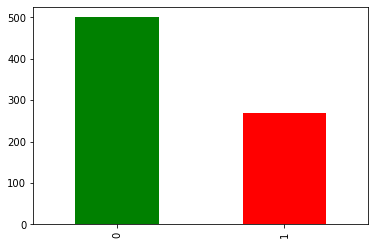

In [12]:
# Number of positive cases vs negative cases
dia["Outcome"].value_counts().plot(kind = 'bar',color=["green","red"]);

In [13]:
# Finding Correlation between the columns
dia.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


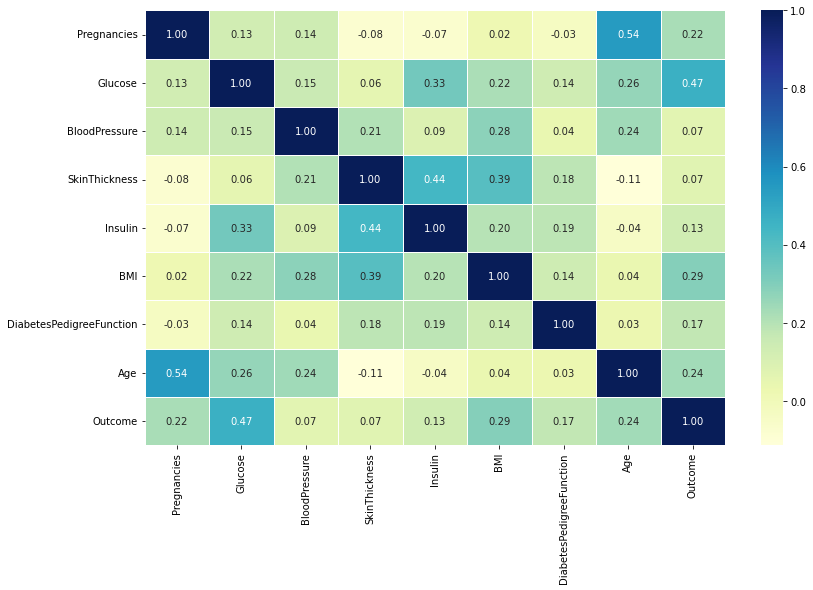

In [15]:
# Visualising the correlation
corr_mat = dia.corr()
fig,ax = plt.subplots(figsize = (13,8))
ax = sns.heatmap(corr_mat,annot=True,fmt='.2f',linewidths=0.5,cmap="YlGnBu")

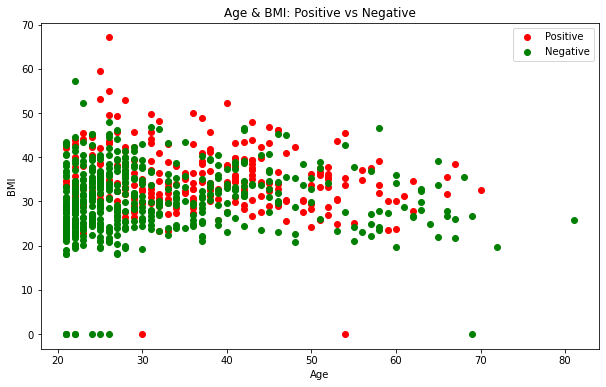

In [23]:
# BMI and Age 

plt.figure(figsize=(10,6))

# Positive cases
plt.scatter(dia.Age[dia.Outcome == 1],
            dia.BMI[dia.Outcome == 1],
            c="red")

# Negative cases
plt.scatter(dia.Age[dia.Outcome == 0],
            dia.BMI[dia.Outcome == 0],
            c="green")

# Labeling
plt.title("Age & BMI: Positive vs Negative")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["Positive","Negative"]);

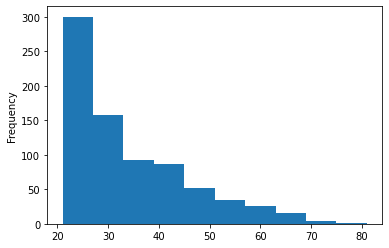

In [26]:
# Age Distribution
dia.Age.plot.hist();

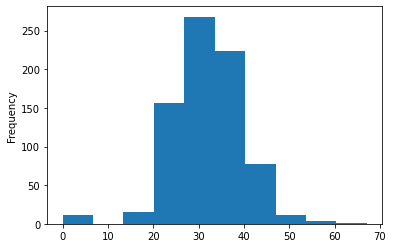

In [41]:
dia.BMI.plot.hist();

#### Data modeling

In [43]:
# Splitting the data

x = dia.drop("Outcome",axis=1)
y = dia["Outcome"]

np.random.seed(42) 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Model fitting
* KNN
* Logistic Regression
* RandomForestClassifier

In [44]:
# Dictionary for model

models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "RandomForestClassifier" : RandomForestClassifier()}

# Defining a function to fit the model

def FitModel(models,x_train,x_test,y_train,y_test):
    np.random.seed(42) 
    
    model_score = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [45]:
model_scores = FitModel(models=models,
                        x_train=x_train,
                        x_test=x_test,
                        y_train=y_train,
                        y_test=y_test)
model_scores

C:\Users\haree\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7467532467532467,
 'KNN': 0.6623376623376623,
 'RandomForestClassifier': 0.7207792207792207}

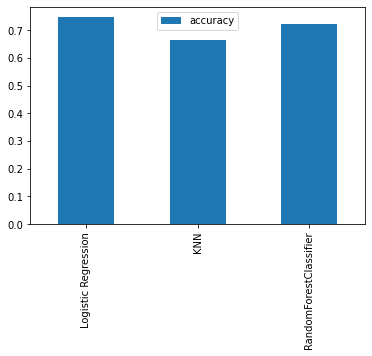

In [46]:
# comparing the model
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

### Improving the model

* Hyperparameter tunuing

In [47]:
# Tunnig KNN
train_score = []
test_score = []

neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

In [48]:
train_score

[1.0,
 0.8322475570032574,
 0.8550488599348535,
 0.8094462540716613,
 0.7980456026058632,
 0.7882736156351792,
 0.7931596091205212,
 0.7768729641693811,
 0.7931596091205212,
 0.7899022801302932,
 0.7866449511400652,
 0.7833876221498371,
 0.7899022801302932,
 0.7899022801302932,
 0.7850162866449512,
 0.7850162866449512,
 0.7833876221498371,
 0.7703583061889251,
 0.7752442996742671,
 0.7719869706840391]

In [49]:
test_score

[0.6753246753246753,
 0.7012987012987013,
 0.6493506493506493,
 0.7077922077922078,
 0.6623376623376623,
 0.7272727272727273,
 0.6883116883116883,
 0.7467532467532467,
 0.7207792207792207,
 0.7662337662337663,
 0.7337662337662337,
 0.7792207792207793,
 0.7727272727272727,
 0.7727272727272727,
 0.7597402597402597,
 0.7792207792207793,
 0.7727272727272727,
 0.7597402597402597,
 0.7532467532467533,
 0.7272727272727273]

In [55]:
 statistics.mean(test_score)

0.7327922077922078

There is slight improvement

Maximum KNN score on the test data: 77.92%


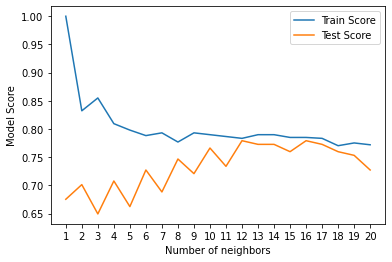

In [57]:
plt.plot(neighbors, train_score, label = "Train Score")
plt.plot(neighbors, test_score, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

## RandomizedSearchCV

In [66]:
# Logistic Regression Grid

L_grid = {"C" : np.logspace(-4,4,20),
          "solver" : ["liblinear"]}

# RandomForest Grid

R_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

# KNN

KNN_grid = {'n_neighbors' : [3,5,11,19],
            'weights' : ['uniform','distance'],
            'metric' : ['euclidean','manhattan']}

In [59]:
# For Logistic Regression

np.random.seed(42)

RS_log = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=L_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)

RS_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [60]:
RS_log.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [61]:
RS_log.best_score_

0.7687458349993336

Sligth improvement

In [62]:
# RandomForest

np.random.seed(42)

RS_RF = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = R_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

RS_RF.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [63]:
RS_RF.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [64]:
RS_RF.best_score_

0.7834332933493269

In [68]:
# KNN

np.random.seed(42)

RS_knn = RandomizedSearchCV(KNeighborsClassifier(),
                           param_distributions = KNN_grid,
                           cv = 5,
                           n_iter = 16,
                           verbose = True)

RS_knn.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=16,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 11, 19],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [69]:
RS_knn.best_params_

{'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan'}

In [70]:
RS_knn.best_score_

0.7459949353591896

## GridSearchCV

In [71]:
# For Logistic Regression

np.random.seed(42)

GS_log = GridSearchCV(LogisticRegression(),
                            param_grid = L_grid,
                            cv = 5,
                            verbose = True)

GS_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [72]:
GS_log.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [73]:
GS_log.best_score_

0.7687458349993336

In [78]:
# RandomForest

R1_grid = {"n_estimators" : np.arange(10, 1000, 200),
           "max_depth" : [None, 10],
           "min_samples_split" : np.arange(2, 20, 5),
           "min_samples_leaf" : np.arange(1, 20, 5)}

np.random.seed(42)

GS_RF = GridSearchCV(RandomForestClassifier(),
                           param_grid = R1_grid,
                           cv = 2,
                           verbose = True)

GS_RF.fit(x_train,y_train)

Fitting 2 folds for each of 160 candidates, totalling 320 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10],
                         'min_samples_leaf': array([ 1,  6, 11, 16]),
                         'min_samples_split': array([ 2,  7, 12, 17]),
                         'n_estimators': array([ 10, 210, 410, 610, 810])},
             verbose=True)

In [79]:
GS_RF.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 210}

In [80]:
GS_RF.best_score_

0.7801302931596091

In [82]:
# KNN

np.random.seed(42)

GS_knn = GridSearchCV(KNeighborsClassifier(),
                           param_grid = KNN_grid,
                           cv = 5,
                           verbose = True)

GS_knn.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [83]:
GS_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [84]:
GS_knn.best_score_

0.7459949353591896

# Final Results

In [85]:
print("Best Scores")
print("RandomForest : ",RS_RF.best_score_)
print("Logistic Regression : ",GS_log.best_score_)
print("KNN : ",max(test_score))

Best Scores
RandomForest :  0.7834332933493269
Logistic Regression :  0.7687458349993336
KNN :  0.7792207792207793
